# Transfer Learning
Given two things you'd like to distinguish, run a Google image search to download images, then train Resnet50 to distinguish them, and view classified images. 

## Example: Snake vs Moray Eel

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.transfer_learning_model import initialize_project, fit_model, get_val_image_paths, make_predictions
from src.data.download_data import download_google_images
from src.visualization.visualize import plot_model_history

## Define objects and make directories

In [3]:
thing1 = 'Snake'
thing2 = 'Moray Eel'
(data_dir, model_dir) = initialize_project(thing1, thing2)
data_dir

'../data/raw/snake_vs_moray_eel'

## Download google images for the two things

In [4]:
%%time
download_google_images([thing1, thing2], data_dir)


Item no.: 1 --> Item name = Snake
Evaluating...
Starting Download...
Completed Image ====> 1. invasive-tactics-tree_snake.jpg
Completed Image ====> 2. brown_tree_snake_boiga_irregularis_2_usgs_photograph.jpg
Completed Image ====> 3. black-tiger-snake.jpg
Completed Image ====> 4. garter-snake-jeffrey-meyer-dpc.jpg
Completed Image ====> 5. main_smooth-snake-banner.jpg
Completed Image ====> 6. donated-398160-hannahgrove.jpg
Completed Image ====> 7. pseudonaja-textiles-juv.jpg
Completed Image ====> 8. king-brown-snake-australia.jpg
Completed Image ====> 9. grass%20snake%20ctpt%20david%20chamberlain.jpg
Completed Image ====> 10. how-avoid-snakes-yard-garden-featured.jpg
Completed Image ====> 11. red-tailed-boa_dark-background-3_with-hint-of-blue_700x467.jpg
Completed Image ====> 12. copperhead.jpg
Completed Image ====> 13. plains-hog-nosed-snake-snout.jpg
Completed Image ====> 14. boa_constrictor.jpg
Completed Image ====> 15. diamondback.jpg
Completed Image ====> 16. redbelliedsnake_unk.jp

Completed Image ====> 43. hooked-thread-snake.jpg
Completed Image ====> 44. 8814370-3x2-700x467.jpg
Completed Image ====> 45. p03tt5gr.jpg
Completed Image ====> 46. blue-and-red-snake-810x456.jpg
Completed Image ====> 47. 779731.jpg
Completed Image ====> 48. 031717_ee_snake_main_free.jpg
Completed Image ====> 49. tucsonshovel-nosedsnake_erikenderson.jpg
Completed Image ====> 50. ?w=620&h=413&crop=1&hash=e5197df5dc34e7ce5a994fe821082497d5bfcc32.jpg
Completed Image ====> 51. snakes%203.jpg
Completed Image ====> 52. snake_1480967c.jpg
Completed Image ====> 53. green-snake-strike.jpg
Completed Image ====> 54. hognose_2-1024x683.jpg
Completed Image ====> 55. atretochoana-eiselti-2.jpg
Completed Image ====> 56. 13obssnake-facebookjumbo.jpg
Completed Image ====> 57. istock_000019991896small.jpg
Completed Image ====> 58. shutterstock_557688154-eastern-rattlesnake.jpg
Completed Image ====> 59. 1-kruger-park-brown-house-snake-590.jpg
Completed Image ====> 60. snake-2.jpg
Completed Image ====> 61

Completed Image ====> 84. _dsc4368.jpg
Completed Image ====> 85. morays05.jpg
Completed Image ====> 86. morayeel05.jpg
Completed Image ====> 87. ?m=02&d=20070905&t=2&i=1659137&w=&fh=545px&fw=&ll=&pl=&sq=&r=2007-09-05t200738z_01_n05218599_rtrukop_0_picture0.jpg
Completed Image ====> 88. beached-dead-moray-eel-bermuda-august-20-2013-1.jpg
Completed Image ====> 89. two-peacock-groupers-cooperatively-hunting-with-undulated-moray-eel.jpg
Completed Image ====> 90. spotted-moray-eel-by-florent-charpin.jpg
Completed Image ====> 91. moray-snowflake-zebra_620.jpg
Completed Image ====> 92. eels-in-hawaii.jpg
Completed Image ====> 93. moray-eel-vs-shark.jpg
Completed Image ====> 94. giant-moray-eel.jpg
Completed Image ====> 95. moray-eel.jpg
Completed Image ====> 96. 6412307093_fa2caba5a5_b.jpg
Completed Image ====> 97. moray2.jpg
Completed Image ====> 98. moray_eel.jpg
Completed Image ====> 99. 616px-chain_moray_eel.jpg

Errors: 1


Item no.: 1 --> Item name = Moray Eel
Evaluating...
Starting Dow

## Fit model

In [10]:
%%time
model, history = fit_model(data_dir, model_dir, batch_size=40)

# If you wanted to load a previously fit model 
# model = load_model(f'{model_dir}/model.h5')

Found 185 images belonging to 2 classes.
Found 188 images belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 112s 22s/step - loss: 0.6913 - acc: 0.6353 - val_loss: 0.2114 - val_acc: 0.9375
Epoch 2/10
5/5 [==============================] - 107s 21s/step - loss: 0.3852 - acc: 0.8026 - val_loss: 0.1722 - val_acc: 0.9688
Epoch 3/10
5/5 [==============================] - 104s 21s/step - loss: 0.2171 - acc: 0.9393 - val_loss: 0.0922 - val_acc: 0.9688
Epoch 4/10
5/5 [==============================] - 105s 21s/step - loss: 0.1769 - acc: 0.9645 - val_loss: 0.0819 - val_acc: 0.9688
Epoch 5/10
5/5 [==============================] - 97s 19s/step - loss: 0.1341 - acc: 0.9899 - val_loss: 0.0771 - val_acc: 0.9688
Wall time: 8min 56s


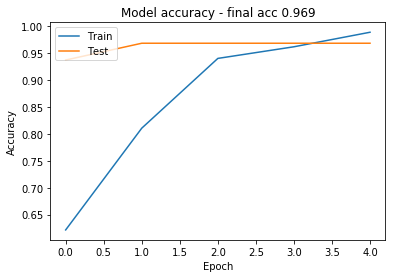

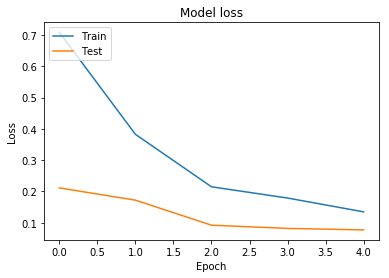

In [11]:
plot_model_history(history)

## Get images and make predictions

In [12]:
img_paths = get_val_image_paths([thing1, thing2], data_dir, n=20, seed=5)
predictions = make_predictions(model, img_paths, [thing1, thing2])

## Display the images with predictions

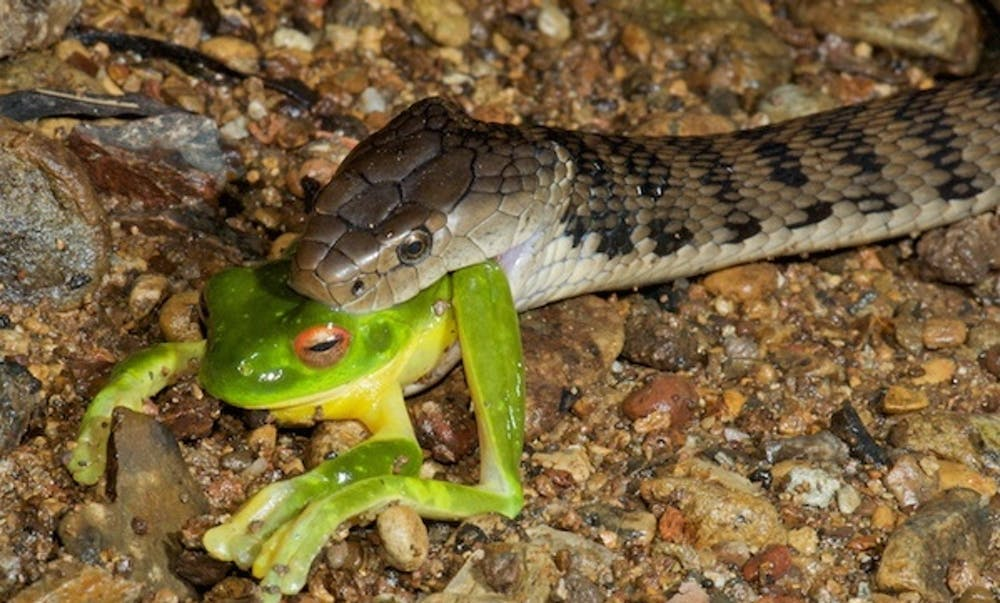

('Snake', 0.83549815)


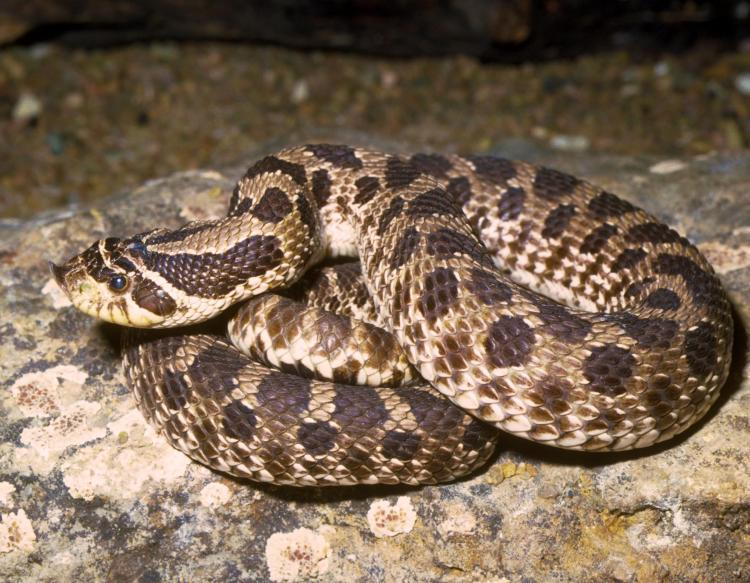

('Snake', 0.9723235)


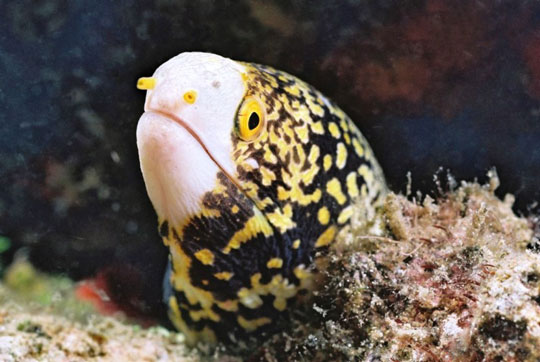

('Moray Eel', 0.8439299)


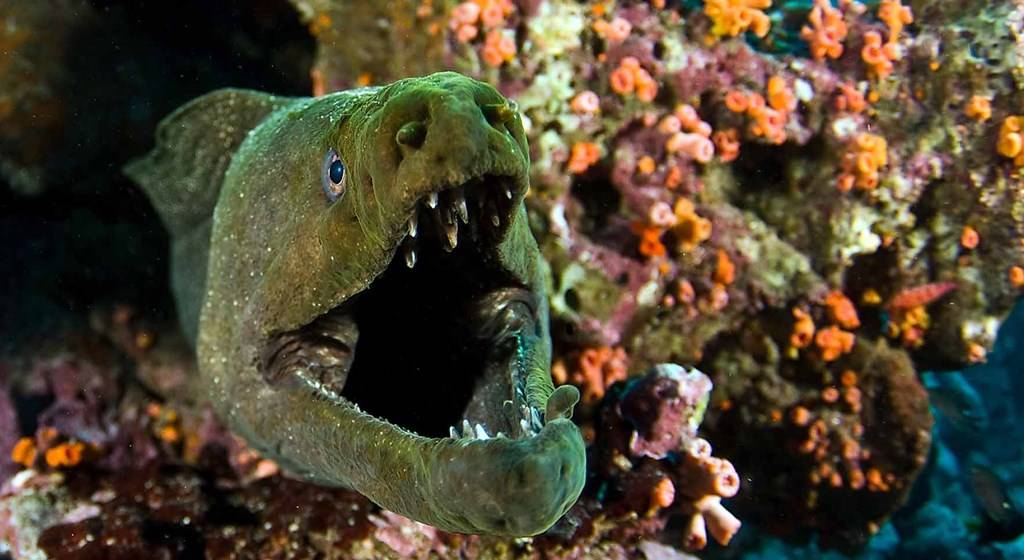

('Moray Eel', 0.9963392)


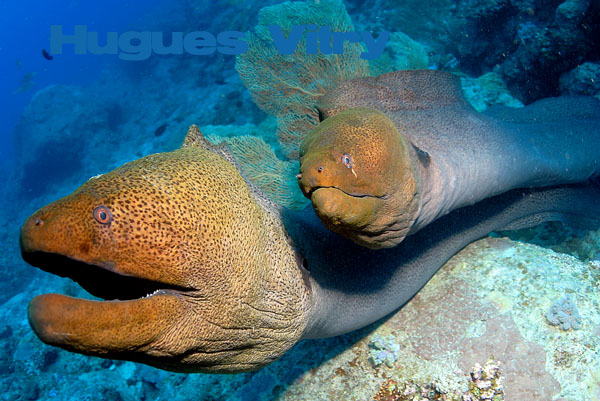

('Moray Eel', 0.9964812)


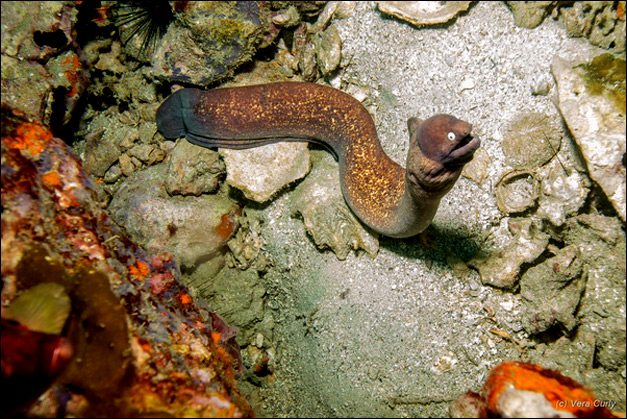

('Snake', 0.6401882)


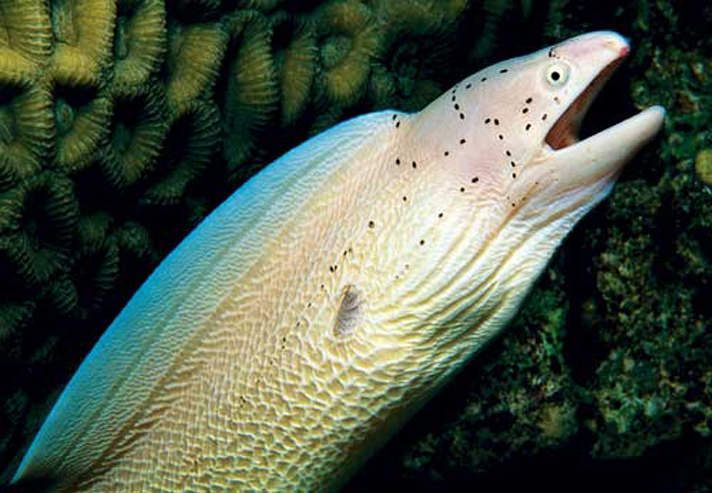

('Moray Eel', 0.94550616)


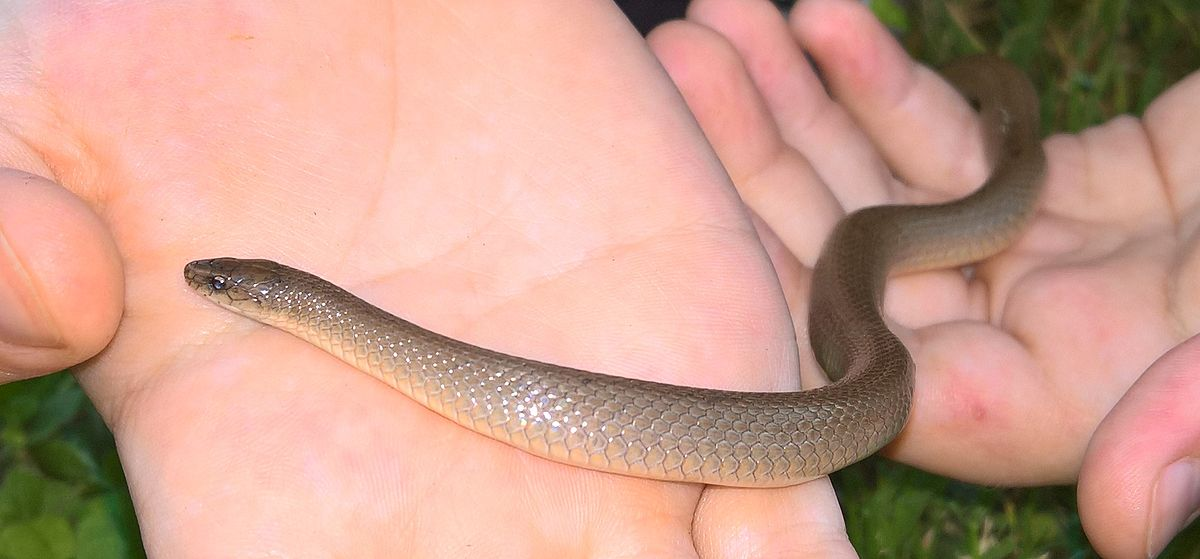

('Snake', 0.9597777)


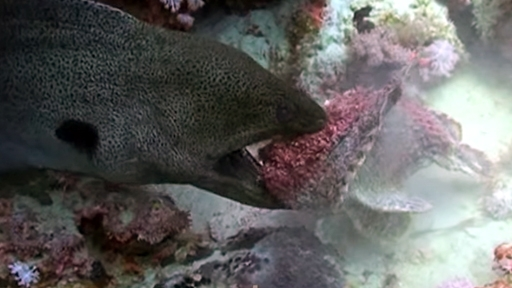

('Moray Eel', 0.9895835)


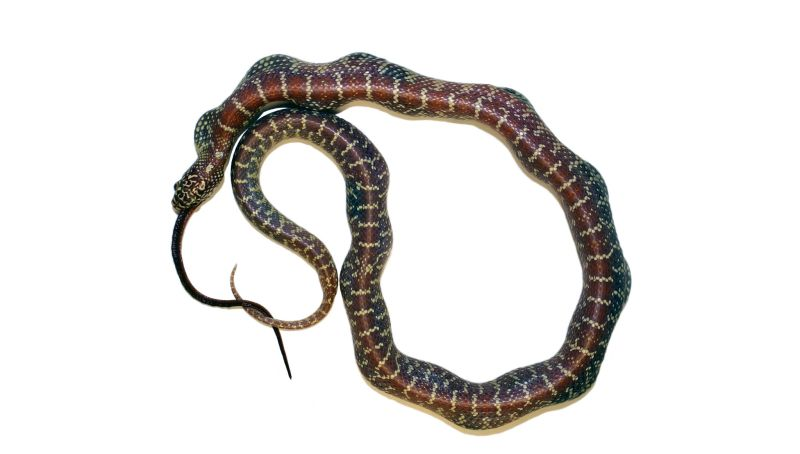

('Snake', 0.97198033)


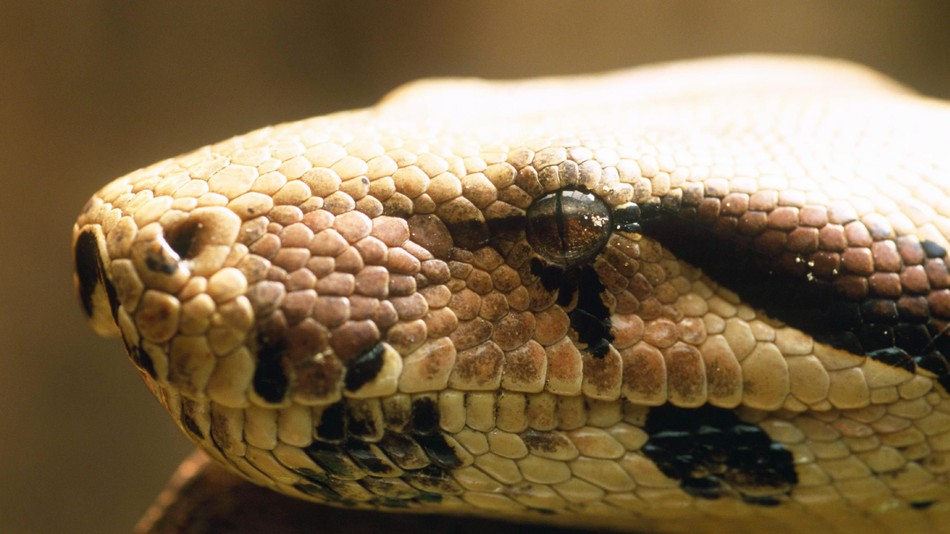

('Snake', 0.9418781)


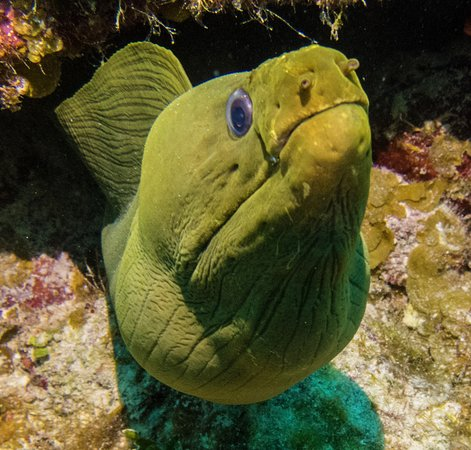

('Moray Eel', 0.98431855)


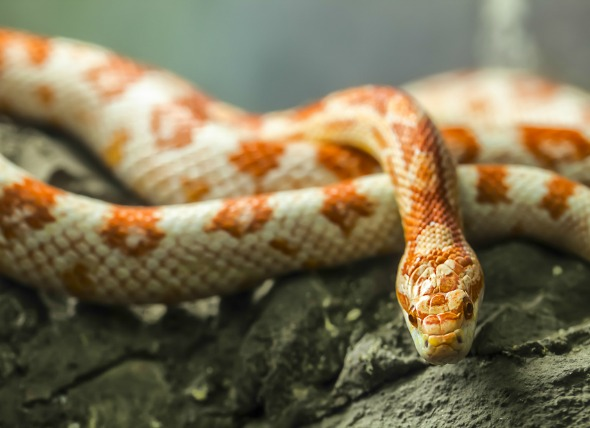

('Snake', 0.9973769)


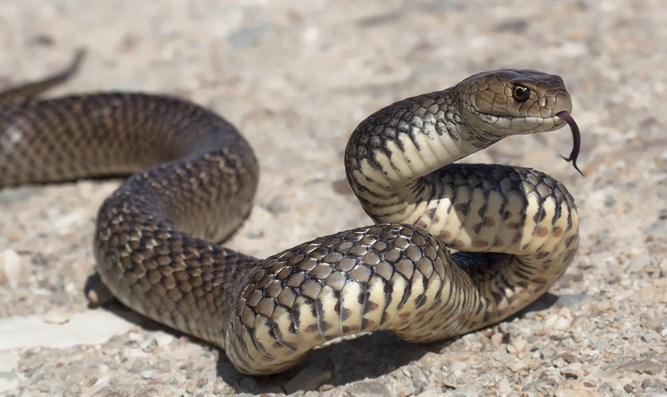

('Snake', 0.98930883)


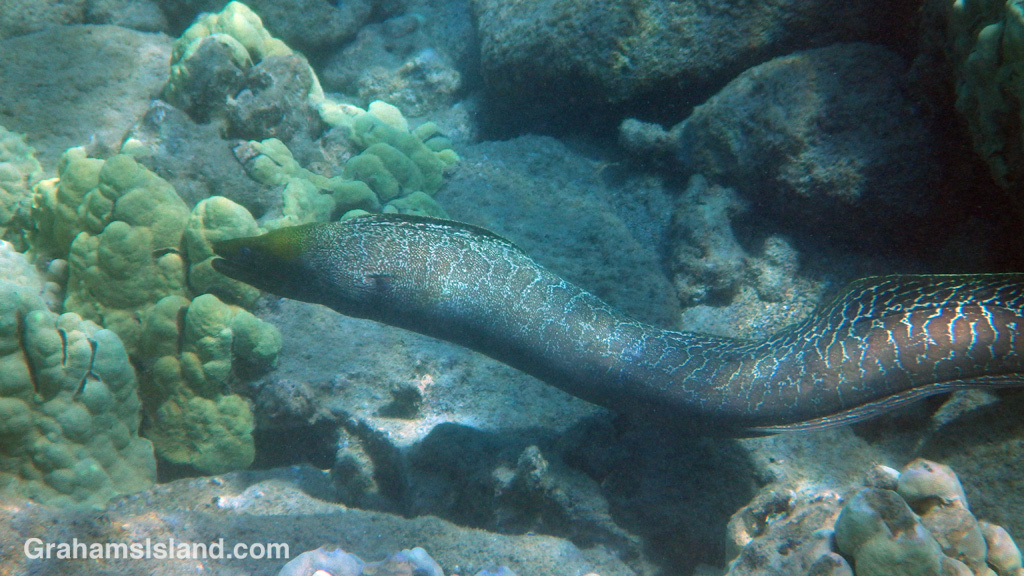

('Moray Eel', 0.91022587)


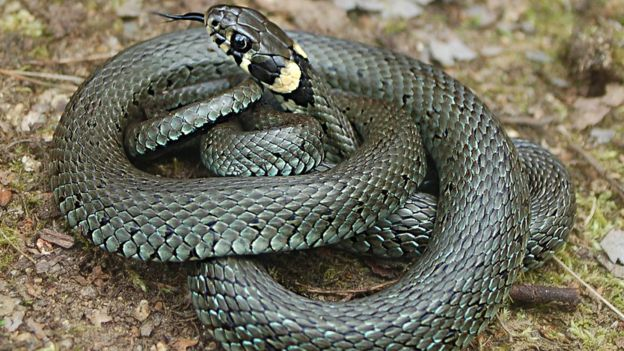

('Snake', 0.99923956)


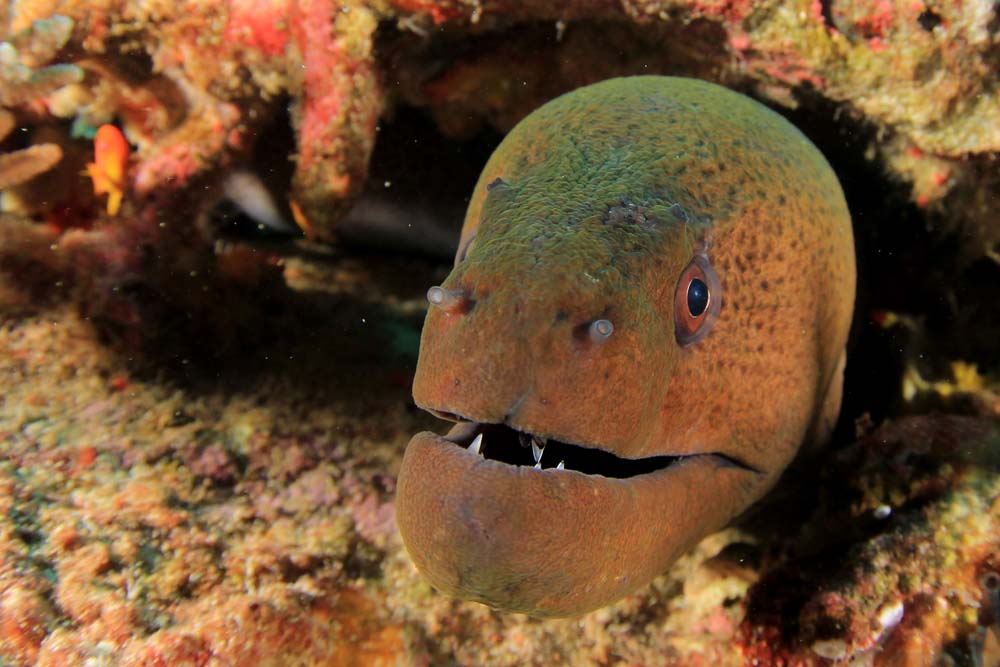

('Moray Eel', 0.9792515)


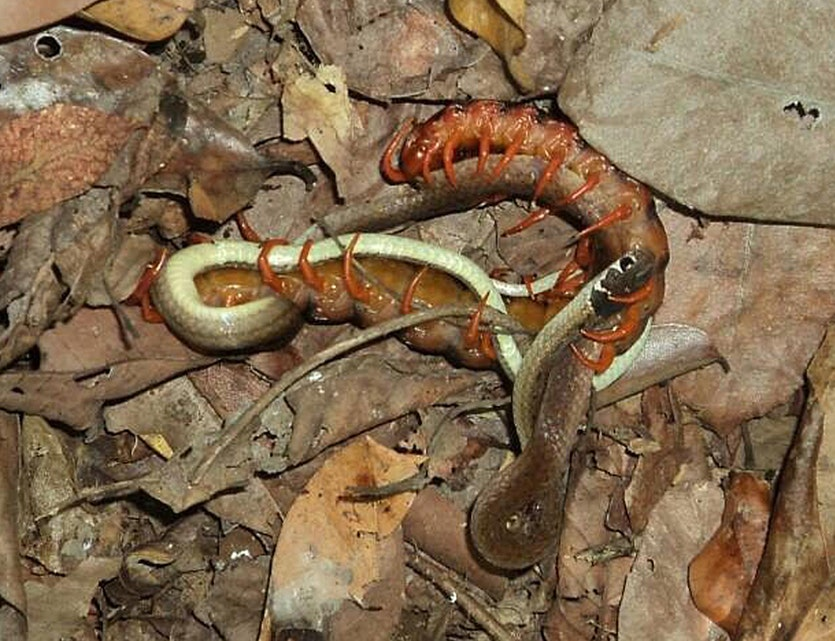

('Snake', 0.99808526)


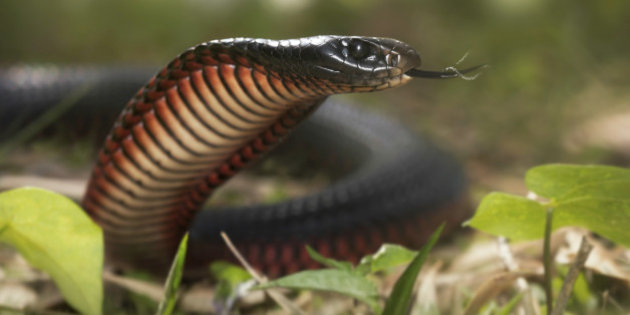

('Snake', 0.93787426)


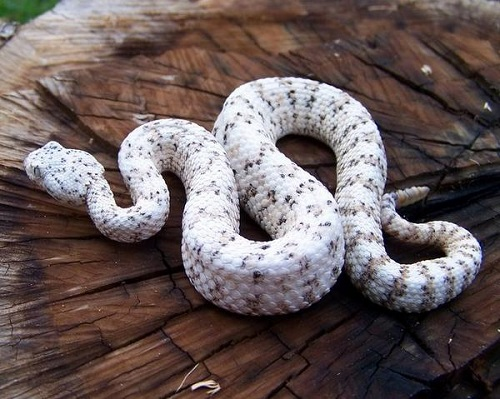

('Snake', 0.998259)


In [13]:
from IPython.display import Image, display

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(predictions[i])

In [9]:
# Trying to save labelled images to disk
# Doesn't work 

# import fpdf
# fpdf.image(img_paths[0], x = None, y = None, w = 0, h = 0, type = '', link = '')

# from fpdf import FPDF
# pdf = FPDF()
# pdf.add_page()
# pdf.set_font('Arial', 'B', 16)
# pdf.cell(40, 10, 'Hello World!')
# plot_model_history(history)
# pdf.output('tuto1.pdf', 'F')